**선형회귀란?**

x변수: 설명변수<br>
y변수: 반응변수

한 개 이상의 설명변수가 있다: x가 여러개다

베타는 선형회귀 계수: 변수에 곱해지는 계수<br>
계수 개수=변수개수+1<br>
계수는 파라미터: 정해지는 수치로 우리가 정하지 못함 => 변수가 많으면 계수도 많다<br>

e는 오차를 흡수하는 오차항(잔차)

**선형회귀 사용하는 이유**

1. 반응변수 Y가 아파트 가격이라면 유효한 설명변수는?<br>
면적,위치,역세권 중 뭐가 중요한가?<br><br>

2. 설명변수 값을 가지고 있을 때 반응변수의 값을 계산(예측)한다<br>
면적 30평, 역세권 아파트의 가격은?<br>

   예측은 공개되지 않은 적정값을 계산한다는 의미

## 1. Linear regression with 'Galton' data: 'Galton' 데이터를 사용한 선형 회귀

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression  #선형회귀를 위해 불러옴
%matplotlib inline

### 1.1. Read in data and visualize:

In [2]:
os.chdir(r'C:\Users\Gram\Desktop\myPyCode\04 머신러닝 - 실습\data')                

In [3]:
df = pd.read_csv('data_galton.csv', header='infer')

In [4]:
df.head()   #실수형이지만 반복되는 값들이 있음

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [5]:
myTable = pd.crosstab(df.parent,df.child)   #얼마나 반복되는지 도수분포표로 집계
myTable

child,61.7,62.2,63.2,64.2,65.2,66.2,67.2,68.2,69.2,70.2,71.2,72.2,73.2,73.7
parent,,,,,,,,,,,,,,
64.0,1,0,2,4,1,2,2,1,1,0,0,0,0,0
64.5,1,1,4,4,1,5,5,0,2,0,0,0,0,0
65.5,1,0,9,5,7,11,11,7,7,5,2,1,0,0
66.5,0,3,3,5,2,17,17,14,13,4,0,0,0,0
67.5,0,3,5,14,15,36,38,28,38,19,11,4,0,0
68.5,1,0,7,11,16,25,31,34,48,21,18,4,3,0
69.5,0,0,1,16,4,17,27,20,33,25,20,11,4,5
70.5,1,0,1,0,1,1,3,12,18,14,7,4,3,3
71.5,0,0,0,0,1,3,4,3,5,10,4,9,2,2


In [6]:
#도수분포표를 산점도로 시각화
#점의 크기=빈도
nrows = myTable.shape[0]      #테이블의 가로축,세로축값을 가져
ncols = myTable.shape[1]
childHeights = list(myTable.columns) #myTable에서 칼럼의 이름들 가져옴
parentHeights = list(myTable.index)

#이부분이 핵심임!!!
combo = [ (x,y,myTable.loc[x,y]) for x in parentHeights for y in childHeights]   
           #x는 부모신장 y는 학생신장 myTable에서 loc해서 그 위치의 도수를 가져옴(튜플들을 리스트로 묶음)
           
combo = pd.DataFrame(combo, columns = ['x','y','freq'])  #콤보를 데이터프레임화 #combo는 튜플의 리스트

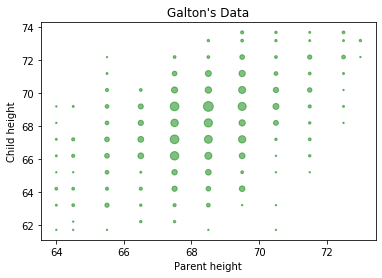

In [7]:
#산점도 
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='green',alpha=0.5)   #반복되는 값들은 겹쳐서 표현됨, 반복되면 더 큰 원형으로 나타내자 
            #가로축좌표시리즈,세로축좌표사이즈,사이즈를 시리즈로(2를 곱하면 크기커짐)     
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Data")
plt.show()

### 1.2. Linear regression training: 선형 회귀 훈련

**선형회귀 학습과 예측**

학습용, 예측용(시험용) 2개로 쪼개놔야함<br>
어떤 경우는 쪼개고 어떤경우는 안쪼갬

1. 학습단계: 학습용 데이터를 사용해서 파라미터 계산해본다<br><br>
2. 예측단계: 새롭게 x프라임이 주어진다면, 아직은 알지 못하는 y프라임을 계산하는것<br>
   설명변수가지고 응답변수 값을 계산하는 것<br>
   데이터가 주어졌을 때 y변수가 취할 수 있는 기댓값

In [8]:
#선형회귀 객체를 만듬
lm = LinearRegression(fit_intercept=True)  #fit_intercept=True: 인터셉터가 있으니 0을 안지나도 됨 
                                           #fit_intercept=False: 인터셉트 없으니 좌표축의 원점을 지남

In [9]:
# 학습시킴
lm.fit(df[['parent']],df[['child']])  #학습, x(부모), y(학생)

# 추세선 그리고 싶을 때는 train,test 쪼갤 필요없음
# 따라서 train,test 분리안하고 그냥 진행

#데이터프레임에서 부모를 데이터프레임으로 가져옴
#시리즈(한겹)는 계산 안됨

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
#베타 0이 나옴(절편)
lm.intercept_       

array([23.94153018])

In [11]:
#베타 1이 나옴(기울기)
lm.coef_          

array([[0.64629058]])

### 1.3. Visualization of the regression line: 회귀선 시각화

In [12]:
# Predicted Y.
predY = lm.predict(df[['parent']]) #in 샘플 예측: tranin,test구분 안했으므로 in-sample (추세선 구할 때는 분리안함)

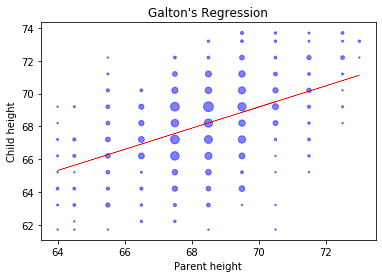

In [13]:
#추세선 넣어 다시 시각화
plt.plot(df.parent.values,predY,c = 'red',linestyle='-',linewidth=0.5)  #line plot 추가
#가로는 parent.values해서 넘피배열, 세로는 predY(넘피배열)로 선을 그려라 (빨간색으로~)
#parent하면 시리즈, predY가 넘피배열이니 오류 날까봐 .values로 넘피배열 화

plt.scatter(combo.x, combo.y, s=combo.freq*2, c='blue',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Regression")
plt.show()

In [14]:
df.parent  #시리즈

0      70.5
1      68.5
2      65.5
3      64.5
4      64.0
       ... 
923    69.5
924    69.5
925    69.5
926    69.5
927    69.5
Name: parent, Length: 928, dtype: float64

In [17]:
df.parent.values  #넘피배열

array([[69.50501621],
       [68.21243505],
       [66.2735633 ],
       [65.62727272],
       [65.30412743],
       [67.56614446],
       [67.56614446],
       [67.56614446],
       [66.91985388],
       [66.91985388],
       [66.91985388],
       [65.62727272],
       [69.50501621],
       [68.85872563],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [67.56614446],
       [67.56614446],
       [67.56614446],
       [67.56614446],
       [67.56614446],
       [66.91985388],
       [66.91985388],
       [66.91985388],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [65.62727272],
       [65.62727272],
       [65.62727272],
       [65.62727272],
       [65.30412743],
       [65.30412743],
       [68.85872563],
       [68

In [18]:
predY         #넘피배열

array([[69.50501621],
       [68.21243505],
       [66.2735633 ],
       [65.62727272],
       [65.30412743],
       [67.56614446],
       [67.56614446],
       [67.56614446],
       [66.91985388],
       [66.91985388],
       [66.91985388],
       [65.62727272],
       [69.50501621],
       [68.85872563],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [67.56614446],
       [67.56614446],
       [67.56614446],
       [67.56614446],
       [67.56614446],
       [66.91985388],
       [66.91985388],
       [66.91985388],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [65.62727272],
       [65.62727272],
       [65.62727272],
       [65.62727272],
       [65.30412743],
       [65.30412743],
       [68.85872563],
       [68

In [16]:
df[['parent']]   #데이터프레임

,parent
0,70.5
1,68.5
2,65.5
3,64.5
4,64.0
...,...
923,69.5
924,69.5
925,69.5
926,69.5
